In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
df=''
def load_data(file):
    global df
    df=pd.read_csv(file)
    return df
load_data('PS_20174392719_1491204439457_log.csv')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [79]:
def describe(data):
    return data.describe()
describe(df)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [80]:
def is_null(data):
    return data.isna().sum()
is_null(df)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

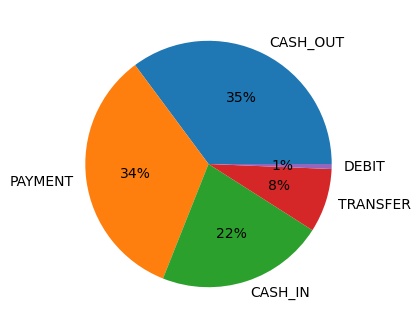

In [81]:
def prop(data):
    type = data['type'].value_counts()
    transaction = type.index
    count = type.values

    # drawing piechart
    plt.figure(figsize=(8,4))
    plt.pie(count, labels=transaction, autopct='%1.0f%%')
    plt.show()
prop(df)

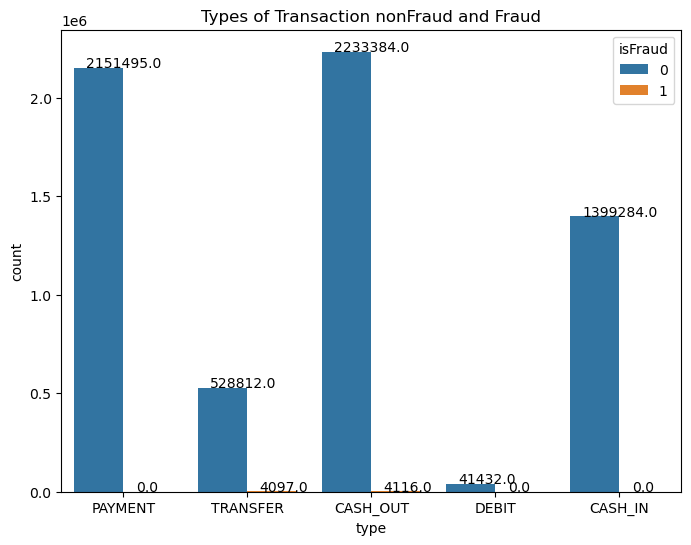

In [82]:
def check_fraud_type(data):
    plt.figure(figsize=(8,6))
    ax=sns.countplot(x = "type", hue="isFraud", data = data)
    plt.title('Types of Transaction nonFraud and Fraud')
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
check_fraud_type(df)

In [83]:
def remove_cols(data):
    global df
    df = data.drop(['nameOrig', 'nameDest'], axis=1)
remove_cols(df)

In [84]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [85]:
variety={'PAYMENT':0,'TRANSFER':1,'CASH_OUT':2,'DEBIT':3,'CASH_IN':4}

In [88]:
df['type']=df['type'].map(variety)

In [89]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,2,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [90]:
def feature_selection(data):
    x=data.drop(['isFraud','isFlaggedFraud'],axis=1)
    y=data.isFraud
    undersample = RandomUnderSampler(sampling_strategy='majority')
    global x_over,y_over
    x_over, y_over = undersample.fit_resample(x, y)
    print(Counter(y_over))
    global x_train,x_test,y_train,y_test
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.25,random_state=1)
feature_selection(df)

Counter({0: 8213, 1: 8213})


In [91]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12319, 7), (4107, 7), (12319,), (4107,))

In [92]:
y_over.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [93]:
def Training(x_train,y_train):
    param_grid = {'n_neighbors': range(1,11)}
    global knn
    knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
    knn.fit(x_train,y_train)
    return knn.best_params_
Training(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.950 total time=   0.1s
[CV 2/5] END .....................n_neighbors=1;, score=0.961 total time=   0.1s
[CV 3/5] END .....................n_neighbors=1;, score=0.947 total time=   0.1s
[CV 4/5] END .....................n_neighbors=1;, score=0.957 total time=   0.1s
[CV 5/5] END .....................n_neighbors=1;, score=0.955 total time=   0.1s
[CV 1/5] END .....................n_neighbors=2;, score=0.947 total time=   0.1s
[CV 2/5] END .....................n_neighbors=2;, score=0.953 total time=   0.1s
[CV 3/5] END .....................n_neighbors=2;, score=0.950 total time=   0.1s
[CV 4/5] END .....................n_neighbors=2;, score=0.952 total time=   0.1s
[CV 5/5] END .....................n_neighbors=2;, score=0.953 total time=   0.1s
[CV 1/5] END .....................n_neighbors=3;, score=0.947 total time=   0.1s
[CV 2/5] END .....................n_neighbors=3;

{'n_neighbors': 1}

In [94]:
def Report(y_test,pred):
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))

In [95]:
def predict(x_test,y_test):
    global pred
    pred=knn.predict(x_test)
    return Report(y_test,pred)
predict(x_test,y_test)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2042
           1       0.95      0.97      0.96      2065

    accuracy                           0.96      4107
   macro avg       0.96      0.96      0.96      4107
weighted avg       0.96      0.96      0.96      4107

[[1941  101]
 [  67 1998]]


In [106]:
def classify(a,b,c,d,e,f,g):
    arr=np.array([a,b,c,d,e,f,g])
    arr[1]=variety[arr[1]]
    arr=arr.astype('float64')
    arr=arr.reshape((1,-1))
    return knn.predict(arr)
classify(743,'TRANSFER',850002.52,850002.52,0.00,0.00,0.00)

C:\Users\Python\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)